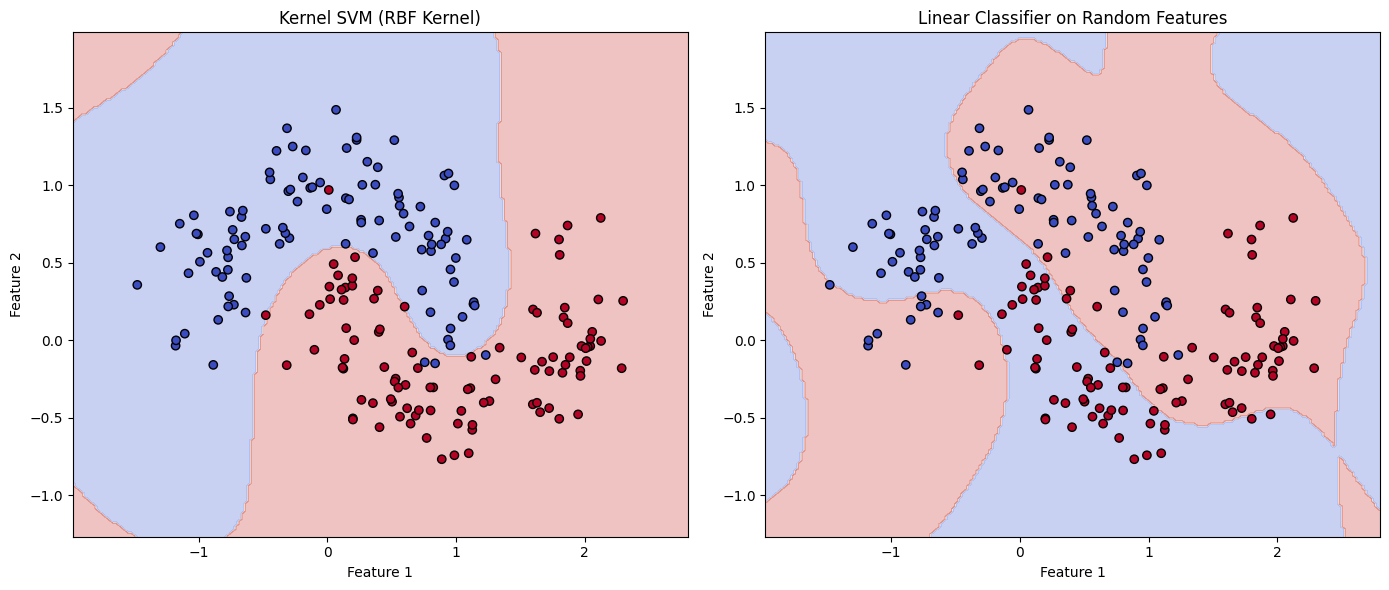

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_moons

def random_features(X, D, sigma):
    """
    Compute random features to approximate a Gaussian kernel.
    
    Parameters:
        X: array of shape (n_samples, d)
        D: number of random features
        sigma: kernel width (standard deviation for the Gaussian)
    
    Returns:
        Z: array of shape (n_samples, D), the random feature mapping.
    """
    n, d = X.shape
    # For a Gaussian kernel, the distribution F is N(0, 1/sigma^2 I)
    W = np.random.normal(loc=0, scale=1.0/sigma, size=(d, D))
    # Random phase from Uniform[-pi, pi]
    u = np.random.uniform(low=-np.pi, high=np.pi, size=D)
    # Compute the random features (scaled cosine functions)
    Z = np.sqrt(2.0/D) * np.cos(X.dot(W) + u)
    return Z

# Generate a non-linear dataset (two interleaving half-moons)
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
# Convert labels to {-1, +1} for consistency
y = 2*y - 1

# Parameters for random features
D = 1000       # number of random features
sigma = 0.5  # kernel width for the Gaussian kernel

# Compute random features for the dataset
Z = random_features(X, D, sigma)

# Train a linear classifier on these random features (using ridge classification)
clf_rf = RidgeClassifier(alpha=1.0)
clf_rf.fit(Z, y)

# For comparison, train a kernel SVM using the full Gaussian kernel
clf_kernel = SVC(kernel='rbf', gamma=1/(2*sigma**2), C=1.0)
clf_kernel.fit(X, y)

# Function to plot decision boundaries
def plot_decision_boundary(clf, feature_map=False, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    if feature_map:
        # Map the grid points to random feature space
        grid_mapped = random_features(grid, D, sigma)
        Z_pred = clf.predict(grid_mapped)
    else:
        Z_pred = clf.predict(grid)
        
    Z_pred = Z_pred.reshape(xx.shape)
    plt.contourf(xx, yy, Z_pred, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plt.figure(figsize=(14,6))

# Plot decision boundary for the kernel SVM (exact RBF kernel)
plt.subplot(1, 2, 1)
plot_decision_boundary(clf_kernel, feature_map=False, title="Kernel SVM (RBF Kernel)")

# Plot decision boundary for the linear classifier on random features
plt.subplot(1, 2, 2)
plot_decision_boundary(clf_rf, feature_map=True, title="Linear Classifier on Random Features")

plt.tight_layout()
plt.show()
